In [45]:
'''ví dụ về support vector regressiom'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVR

datasets = pd.read_csv('Salary_Data.csv')
datasets.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [24]:
X = datasets.iloc[:,0].values #chuyen 1 col in df to a numpy array
y = datasets.iloc[:,1].values

model_X = StandardScaler().fit(X.reshape(-1,1))
model_y = StandardScaler().fit(y.reshape(-1,1))

X = model_X.transform(X.reshape(-1,1))
y = model_y.transform(y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = SVR()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)


C:\Users\ainzo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


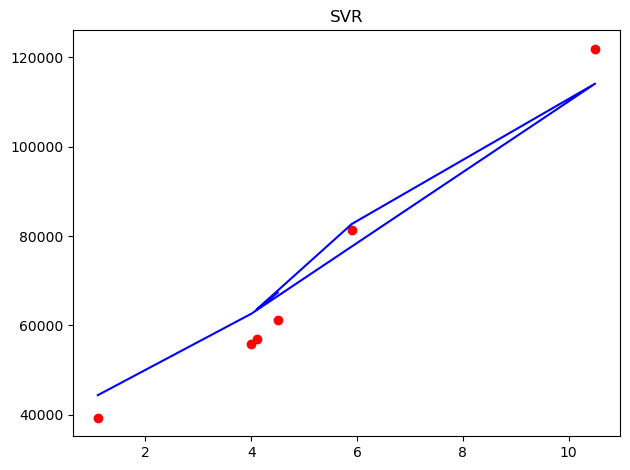

In [25]:
figure, axis = plt.subplots()
axis.scatter(model_X.inverse_transform(X_test.reshape(-1,1)), model_y.inverse_transform(y_test.reshape(-1,1)), color='red',)
axis.plot(model_X.inverse_transform(X_test.reshape(-1,1)), model_y.inverse_transform(y_pre.reshape(-1,1)), color='blue')
axis.set_title("SVR")
plt.tight_layout()
plt.show()

In [32]:
prediction_result = pd.DataFrame({"Prediction": model_y.inverse_transform(y_pre.reshape(-1,1)).ravel(), 
                                  "Actual Value": model_y.inverse_transform(y_test.reshape(-1,1)).ravel()})

print(prediction_result)

      Prediction  Actual Value
0   44410.107122       39343.0
1   62616.373218       55794.0
2  114075.972746      121872.0
3   82688.384509       81363.0
4   63540.223123       57081.0
5   67347.436569       61111.0


In [47]:
rmse = mean_squared_error(y_test, y_pre)
rmse #nice!

0.0494081117795838